# Einleitung zur √úbung: ‚ÄúSensor Sensitivity‚Äù

In dieser √úbung untersuchen wir, wie Umweltfaktoren wie Temperatur, Luftfeuchtigkeit und Druck die Genauigkeit von CO‚ÇÇ-Messungen beeinflussen. Moderne Sensoren wie der GMP343 kompensieren diese Einfl√ºsse mithilfe integrierter Algorithmen: Die Temperatur wird automatisch durch einen internen Sensor ber√ºcksichtigt, w√§hrend weitere Umgebungsparameter wie Luftfeuchtigkeit, Druck oder Sauerstoffkonzentration √ºber externe Sensoren gemessen und dem GMP343 bereitgestellt werden.

Unser Ziel ist es, Werkzeuge kennenzulernen, mit denen sich diese Umwelteinfl√ºsse sichtbar machen und bewerten lassen.

## Hintergrund und Motivation

Die Pr√§zision von Sensorsystemen h√§ngt stark von Umwelteinfl√ºssen ab. Um valide Messwerte zu erhalten, m√ºssen diese Einfl√ºsse erkannt und kompensiert werden ‚Äì oft individuell f√ºr jeden Sensor.

Denn selbst Sensoren desselben Typs k√∂nnen aufgrund von Fertigungs- und Materialunterschieden sowie mechanischer Toleranzen unterschiedliche Sensitivit√§ten aufweisen. Das bedeutet: Die Reaktion auf Temperatur, Druck oder Luftfeuchtigkeit variiert von Sensor zu Sensor.

In [1]:
import polars as pl
import os
import sys
import numpy as np

# Add the parent directory to the system path
PROJECT_PATH = os.path.abspath(os.path.join(".."))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from utils.plot_series import plot_histogram_with_stats
from utils.plot_dataframes import plot_columns
from utils.plot_sensitivities import plot_scatter_with_trendline

In [2]:
df_sbs_2025 = pl.read_parquet("../data/3_Sensor_Sensitivity/2025_Sensor_GMP343_Measurement.parquet")
df_3 = df_sbs_2025.filter(pl.col("system_id") == 3)
df_6 = df_sbs_2025.filter(pl.col("system_id") == 6)

df_sbs_2024 = pl.read_parquet("../data/3_Sensor_Sensitivity/2024_Sensor_GMP343_Measurement.parquet")

# Analyse von zwei Systemen zur gleichen Zeit am gleichen Ort

Nachfolgend betrachten wir st√ºndlich aggreierte Mittelwerte f√ºr die System 3 & 6. 

shape: (2, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ system_id ‚îÜ MEAN      ‚îÜ MAE      ‚îÜ RMSE     ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---      ‚îÜ ---      ‚îÇ
‚îÇ i32       ‚îÜ f64       ‚îÜ f64      ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3         ‚îÜ 0.376829  ‚îÜ 0.498575 ‚îÜ 0.604028 ‚îÇ
‚îÇ 6         ‚îÜ -0.591404 ‚îÜ 0.735412 ‚îÜ 0.898637 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


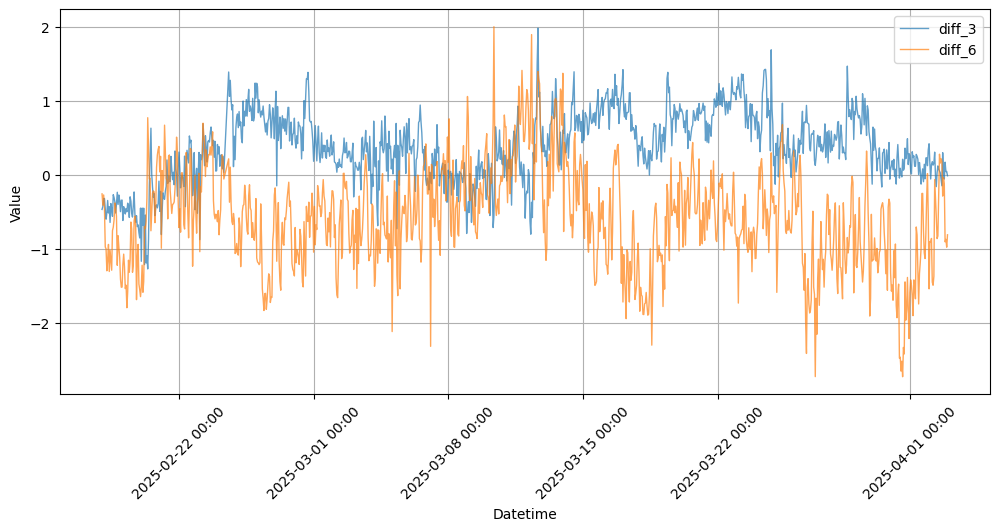

In [3]:
df_plot = df_3.select("datetime", "diff").join(df_6.select("datetime", "diff"), on="datetime", how="inner", suffix="_6").rename({"diff": "diff_3"})

print(df_sbs_2025.group_by(["system_id"]) \
    .agg([
            (pl.col("diff").mean()).alias("MEAN"),
            (np.abs(pl.col("diff"))).mean().alias("MAE"),
            (pl.col("diff").pow(2).mean().sqrt()).alias("RMSE")
        ]) \
    .sort("system_id"))

plot_columns(df_plot, "datetime", ["diff_3", "diff_6"])

# üß™ Praktische √úbung 1

In dieser √úbung lernst du eine alternative M√∂glichkeit kennen, Datenverteilungen darzustellen: Histogramme.

- Ein Histogramm ist eine Visualisierung der H√§ufigkeitsverteilung numerischer Daten. Die x-Achse zeigt dabei Wertebereiche (sogenannte Bins), die y-Achse gibt an, wie viele Werte in jeden Bereich fallen.
- Die Bin Size (Breite der Intervalle) beeinflusst die Darstellung stark: Ist sie zu klein, wirkt das Histogramm unruhig; ist sie zu gro√ü, k√∂nnen wichtige Details verloren gehen. Daher ist es sinnvoll, verschiedene Bin-Gr√∂√üen auszuprobieren.
- Zus√§tzlich betrachten wir zwei wichtige statistische Kenngr√∂√üen:
  - Standardabweichung (Std) misst die durchschnittliche Abweichung der Werte vom Mittelwert ‚Äì> ein Ma√ü f√ºr die Breite der Streuung.
  - Varianz (Var) ist das Quadrat der Standardabweichung ‚Äì> ein Ma√ü f√ºr die st√§rke der Streuung.

‚∏ª

‚úÖ Aufgabe:

1.	Erstelle ein Histogramm indem du die Spalten diff_3 und diff_6 als Polar-Series f√ºr die Funktion als passenden Input umwandelst
2.	√Ñndere die Bin Size, um eine geeignete, aussagekr√§ftige Darstellung der Verteilung zu finden.
3.	Achte dabei auf Mittelwert, Varianz und Standardabweichung ‚Äì sie helfen dir, die Streuung der Daten besser zu interpretieren.

### N√ºtzliche Funktionen
- [Polars Transform: Dataframe -> Series](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.get_column.html#polars.DataFrame.get_column)

Eine Polars Series ist eine 1-dimensionale Datenstruktur, die eine Spalte eines DataFrames repr√§sentiert. Sie ist eine Liste an Datenwerte, die √ºber praktische Funktionen in der Polars-Bibliothek weiter verarbeitet werden k√∂nnen. Eine Series kann aus verschiedenen Datentypen bestehen, darunter Ganzzahlen, Flie√ükommazahlen, Strings und mehr.

```Python
import polars as pl

# Beispiel f√ºr die Umwandlung einer DataFrame-Spalte in eine Series 
df = pl.DataFrame({
    "a": [1, 2, 3],
    "b": [4, 5, 6]
})

# Umwandlung der Spalte "a" in eine Series
series_a = df.get_column("a")
print(series_a)
```

Print-Ausgabe:
```Python
shape: (3,)
Series: 'a' [i64]
[
	1
	2
	3
]
```

In [ ]:
# Wandle das Polars DataFrame "df_plot" f√ºr die Spalte "diff_3" in eine Polars Serie um 
pl_series = df_plot

## Ver√§ndere nachfolgende Parameter
bin_size = 1
#

plot_histogram_with_stats(pl_series, bin_size=bin_size, title="Polars Histogram")

In [ ]:
# Wandle das Polars DataFrame "df_plot" f√ºr die Spalte "diff_6" in eine Polars Serie um 
pl_series = df_plot
#

## Ver√§ndere nachfolgende Parameter
bin_size = 1
#

plot_histogram_with_stats(pl_series, bin_size=bin_size, title="Polars Histogram")

Fragen

- Welches der beiden Systeme weist hinsichtlich der Messgenauigkeit und -stabilit√§t eine geringere Schwankungsbreite auf?
- Was k√∂nnten m√∂gliche Gr√ºnde daf√ºr sein? (Die Antwort erfahren wir sp√§ter)

---

# Analyse der Variabilit√§t von atmosph√§rischen Parametern

In dieser √úbung betrachten wir detailliert die Messreihen zweier Sensorsysteme, indem wir die Zeitreihen f√ºr verschiedene Umweltparameter analysieren. Konkret untersuchen wir die folgenden Variablen:

- **Temperatur**
- **Relative Luftfeuchtigkeit (rH)**
- **Wasserdampfanteil (H‚ÇÇO in Vol%)**
- **Druck (p)**

Diese Messreihen geben uns einen umfassenden Einblick in die Umgebungsbedingungen, unter denen die beiden Systeme betrieben werden. Ziel ist es, die zeitliche Dynamik und m√∂gliche Unterschiede zwischen den Systemen zu erkennen. Dabei sollen unter anderem folgende Aspekte beleuchtet werden:

- Wie variieren die Umweltparameter √ºber den Messzeitraum?
- Wie schnell √§ndern sich unterschiedliche Umweltparameter?
- Gibt es systematische Unterschiede zwischen den beiden Systemen hinsichtlich der gemessenen Temperaturen, Feuchtigkeitswerte, Dr√ºcke und H‚ÇÇO-Anteile?

Diese Analyse legt die Grundlage, um sp√§ter auch Zusammenh√§nge zwischen den Umweltparametern und der Leistung bzw. den Kalibrierungsparametern der Sensorsysteme zu untersuchen. Indem wir diese Zeitreihen vergleichend betrachten, k√∂nnen wir besser verstehen, wie die Betriebsbedingungen die Messdaten beeinflussen.

In [ ]:
rename_dict = {col: col + "_3" for col in df_3.columns}

df_plot = df_3.join(df_6, on="datetime", how="inner", suffix="_6").rename(rename_dict).rename({"datetime_3": "datetime"})

plot_columns(df_plot, "datetime", ["gmp343_temperature_3", "gmp343_temperature_6"])
plot_columns(df_plot, "datetime", ["sht45_humidity_3", "sht45_humidity_6"])
plot_columns(df_plot, "datetime", ["h2o_v%_3", "h2o_v%_6"])
plot_columns(df_plot, "datetime", ["bme280_pressure_3", "bme280_pressure_6"])


# üß™ Praktische √úbung 2

In dieser Aufgabe wollen wir ein Gef√ºhl daf√ºr bekommen welche Werte unser Sensor im Feld ausgesetzt ist. Daf√ºr Berechnen wir die maximale Variabilit√§t und sehen uns die Werte f√ºr Min und f√ºr Max genauer an.

‚úÖ Aufgabe:

- Emittle den maximalen und minimalen Wert f√ºr System 6 f√ºr die Parameter (Temperatur (¬∞C), relative Luftfeuchtigkeit (%), absolute Luftfeuchtigkeit (v%), Druck (hPa))
- Ermittle dann die maximalen Variabilit√§t (max - min) f√ºr die Parameter (Temperatur (¬∞C), relative Luftfeuchtigkeit (%), absolute Luftfeuchtigkeit (v%), Druck (hPa))

### N√ºtzliche Funktionen

- [Polars Transform: Dataframe -> Series](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.get_column.html#polars.DataFrame.get_column)
- [Polars DataFrame Aggregations](https://docs.pola.rs/api/python/dev/reference/dataframe/aggregation.html)

In [ ]:
df_6.head(1)

In [5]:
# Columns (Spalten): ["gmp343_temperature", "sht45_humidity", "h2o_v%", "bme280_pressure"] 

---

# Scatter Plots: Performance von interner Kompensation 

Auch bei stabilen Systembedingungen und vorhandener interner Kompensation k√∂nnen Umwelteinfl√ºsse weiterhin messbare Effekte auf die Genauigkeit der CO‚ÇÇ-Sensoren haben. In dieser √úbung geht es darum, geeignete Werkzeuge zu identifizieren, mit denen sich diese Effekte sichtbar machen, analysieren und vergleichen lassen.

Ausgangslage
- Bisher habt ihr die Verteilung der st√ºndlichen Mittelwerte der Differenz zum Referenzsystem betrachtet
- Zus√§tzlich habt ihr die Bandbreite atmosph√§rischer Bedingungen untersucht
- Nun kombinieren wir beide Aspekte in einem Scatter Plot und erg√§nzen diesen um eine lineare Regression, um systematische Trends zu identifizieren.

## Motivation

Scatter Plots sind ein zentrales Werkzeug zur Visualisierung von Zusammenh√§ngen zwischen Einflussgr√∂√üe und Messabweichung. Mit ihrer Hilfe lassen sich Trends, Korrelationen und individuelle Sensitivit√§ten der Sensoren schnell erfassen.

Diese √úbung soll euch dabei unterst√ºtzen:

- Den Einsatz von Scatter Plots zur Analyse sensorischer Abweichungen zu verstehen
- Die konkreten Effekte von Druck, Temperatur und Luftfeuchtigkeit auf das Sensorsignal zu erkennen
- Nachzuvollziehen, wie unterschiedlich einzelne Sensoren auf Umwelteinfl√ºsse reagieren

In [ ]:
plot_scatter_with_trendline(df_sbs_2024, "h2o_v%", "diff", 2, 2, "Absolute Humidity (vol%)", "System - Reference (ppm)","Scatter Plots: ŒîCO2 vs Absolute Humidity")

In [ ]:
plot_scatter_with_trendline(df_sbs_2024, "bme280_pressure", "diff", 2, 2, "Pressure (hPa)", "System - Reference (ppm)","Scatter Plots: ŒîCO2 vs Pressure" )

In [ ]:
plot_scatter_with_trendline(df_sbs_2024, "gmp343_temperature", "diff", 2, 2, "Temperature (¬∞C)", "System - Reference (ppm)","Scatter Plots: ŒîCO2 vs Temperature")

# üß™ Praktische √úbung 3 

Wir wollen nun den Scatterplot f√ºr die Temperatur genauer betrachten. Hierf√ºr werten wir die Performance innerhalb und ausserhalb der Temperaturstabilisierung des Systems aus. 

### Technischer Hintergrund System (v1)  

In der Outdoor-Enclosure wird die Temperatur mittels einer Hysterese-Regelung (√ºber Heizer und L√ºfter) auf ¬±3¬∞C stabilisiert. Das bedeutet, dass die Temperatur innerhalb eines Toleranzbereichs von 3¬∞C um den Sollwert von 29¬∞C gehalten wird. Bei starker Sonneneinstrahlung st√∂√üt dieses System jedoch an seine Grenzen, wodurch die Temperaturkontrolle nicht mehr m√∂glich ist.
  
‚úÖ Aufgabe:

- Filtere das DataFrame f√ºr Temperaturwerte gr√∂√üer und kleiner 32¬∞C und wiederhole dann die Scatterplots

## Hilfreiche Funktionen

- [Polars Filter](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.filter.html#polars.DataFrame.filter)

In [ ]:
## Filtere die Temperaturwerte f√ºr < 32¬∞C
df_plot = df_sbs_2024
##

plot_scatter_with_trendline(df_plot, "gmp343_temperature", "diff", 2, 2, "Temperature (¬∞C)", "System - Reference (ppm)","Scatter Plots: ŒîCO2 vs Temperature")

In [ ]:
## Filtere die Temperaturwerte f√ºr >= 32¬∞C
df_plot = df_sbs_2024
##

plot_scatter_with_trendline(df_plot, "gmp343_temperature", "diff", 2, 2, "Temperature (¬∞C)", "System - Reference (ppm)","Scatter Plots: ŒîCO2 vs Temperature")

---

# Scatter Plot: Einfluss einer stabilisierten Temperaturregelung

In diesem Schritt untersuchen wir, wie sich eine pr√§zisere Temperaturregelung auf die Sensitivit√§t des Sensors gegen√ºber Temperaturschwankungen auswirkt. System 3 wurde daf√ºr gezielt so aufgebaut, dass es Temperaturschwankungen besonders gut stabilisieren kann. Die Hypothese: Eine geringere Temperaturschwankung im Sensor f√ºhrt zu einer h√∂heren Messstabilit√§t und geringerer Temperaturabh√§ngigkeit.

‚∏ª

## Technischer Hintergrund zu System 3 (v2)

System 3 verf√ºgt √ºber eine zweistufige Temperaturregelung:

- Eine √§u√üere Klimabox h√§lt die Umgebungstemperatur konstant.
- Zus√§tzlich ist der eigentliche Sensor in eine PID-geregelte Heat Box eingebettet, die direkt um den Sensor angeordnet ist.

Diese Konstruktion erm√∂glicht eine Temperaturstabilit√§t von ¬±0,1‚ÄØ¬∞C direkt am Sensor. Dadurch wird eine hochkonstante und reproduzierbare Messumgebung geschaffen, in der Temperatureffekte auf die CO‚ÇÇ-Messung deutlich schw√§cher wirken sollten.

In [ ]:
max_col, max_row = 2, 2

plot_scatter_with_trendline(df_sbs_2025, "h2o_v%", "diff", 2, 2, "Absolute Humidity (vol%)", "System - Reference (ppm)","Scatter Plots: ŒîCO2 vs Absolute Humidity")
plot_scatter_with_trendline(df_sbs_2025, "bme280_pressure", "diff", 2, 2, "Pressure (hPa)", "System - Reference (ppm)","Scatter Plots: ŒîCO2 vs Pressure" )
plot_scatter_with_trendline(df_sbs_2025, "gmp343_temperature", "diff", max_col, max_row, "Temperature (¬∞C)", "System - Reference (ppm)","Scatter Plots: ŒîCO2 vs Temperature")

 Fragen

- **Vergleich der Systeme:**  
  Vergleicht anhand von Scatter Plots, wie sich die Temperaturregelung der beiden Systeme (System 6 (v1) versus System 3 (v2)) auf die Messgenauigkeit auswirkt.  

- **Auswirkungen der Temperaturvariabilit√§t:**  
  Diskutiert, inwiefern die pr√§zise Temperaturstabilisierung in System 3 (v2) zu geringeren Schwankungen und damit zu einer besseren Messperformance f√ºhrt, und wie sich dies im Vergleich zu den Ergebnissen von System 6 zeigt.

- **Weitere L√∂sungen zur Systemstabilisierung:**  
  Diskutiert, welche weiteren L√∂sungen euch zur Stabilisierung der Sensorsensibilit√§t einfallen. Wie gut l√§sst sich eure L√∂sung in die Praxis umsetzen?